<a href="https://colab.research.google.com/github/singhsneha99/Sales-Data-Analysis/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('sales.csv')

# Display the first few rows of the dataset
print(data.head())


    Invoice ID Branch       City Customer_type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total      Date  \
0       Health and beauty       74.69         7  26.1415  548.9715  05/01/21   
1  Electronic accessories       15.28         5   3.8200   80.2200  08/03/21   
2      Home and lifestyle       46.33         7  16.2155  340.5255  03/03/21   
3       Health and beauty       58.22         8  23.2880  489.0480  27/01/21   
4       Sports and travel       86.31         7  30.2085  634.3785  08/02/21   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29    

In [2]:


# Explore categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\n{column} Distribution:")
    print(data[column].value_counts())




Invoice ID Distribution:
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: Invoice ID, Length: 1000, dtype: int64

Branch Distribution:
A    340
B    332
C    328
Name: Branch, dtype: int64

City Distribution:
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Customer_type Distribution:
Member    501
Normal    499
Name: Customer_type, dtype: int64

Gender Distribution:
Female    501
Male      499
Name: Gender, dtype: int64

Product line Distribution:
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Date Distribution:
07/02/21    20
15/02/21    19
14/03/21    18
02/03/21    18
08/01/21    18
            ..
04/01/21     6
28/02/21     6
21/02/21     6
17/03/

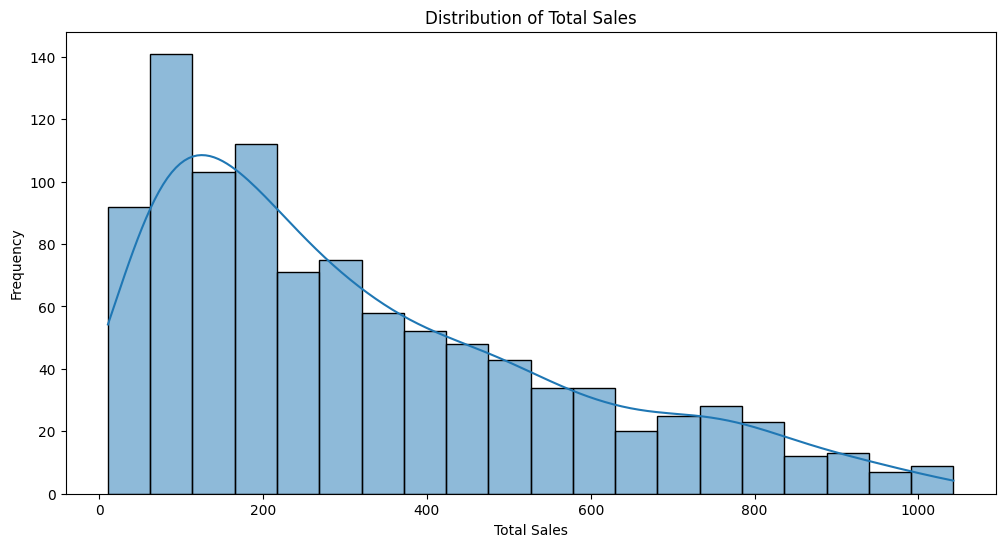

In [6]:

# Visualize the distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(data['Total'], bins=20, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.show()

<ipython-input-4-d2e3d3e6a8cd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


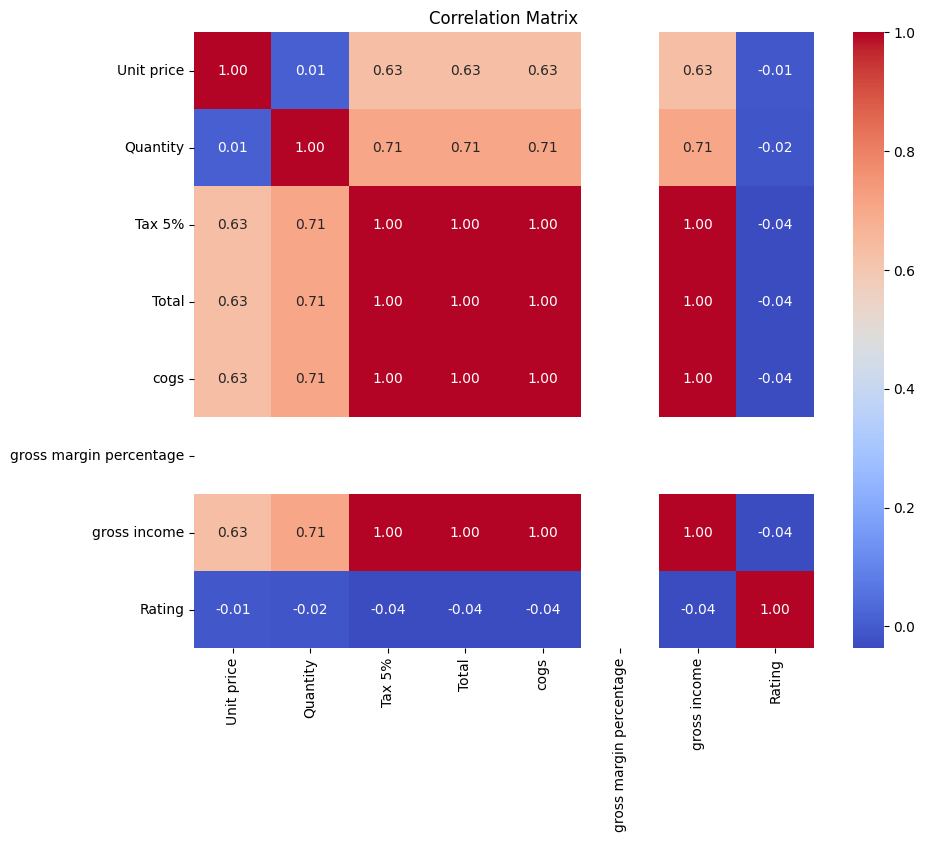

In [4]:
# Visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

VISUALIZATIONS

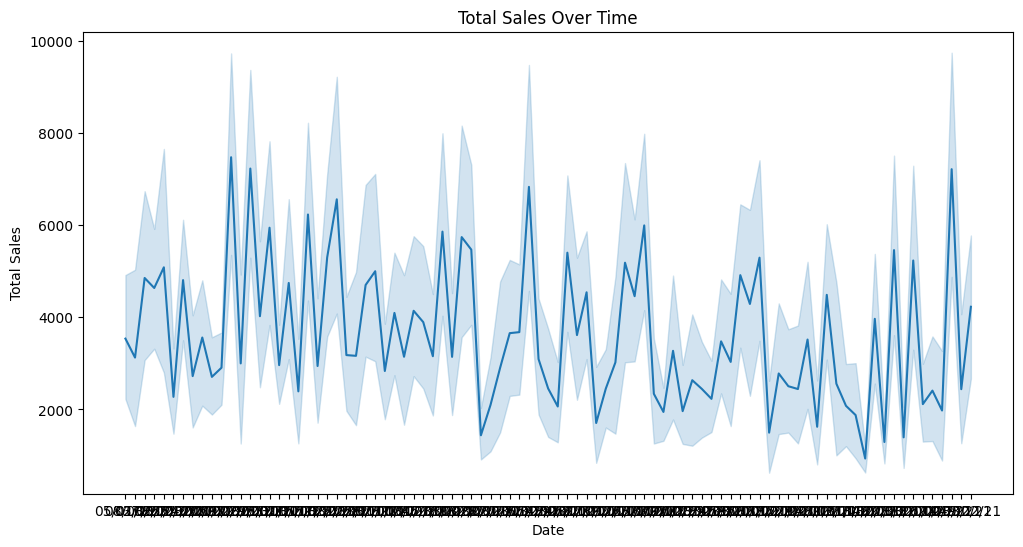

In [7]:
# Visualization 1: Total Sales Over Time (Line chart)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Total', data=data, estimator='sum')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

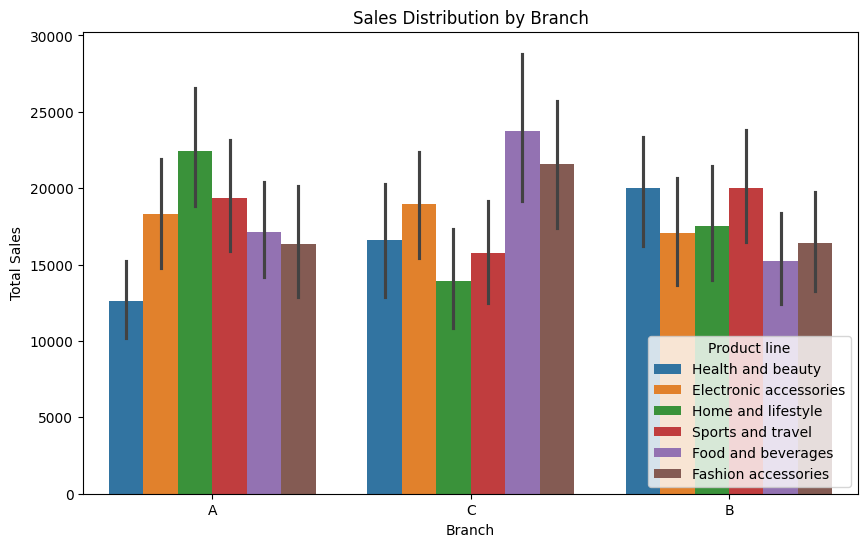

In [8]:
# Visualization 2: Sales Distribution by Branch (Stacked bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', hue='Product line', data=data, estimator=sum)
plt.title('Sales Distribution by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Sales')
plt.show()

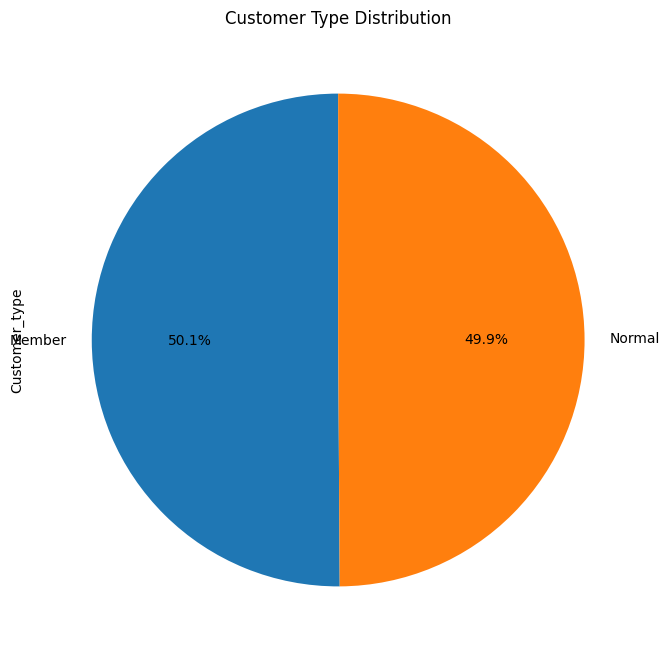

In [9]:
# Visualization 3: Customer Type Distribution (Pie chart)
plt.figure(figsize=(8, 8))
data['Customer_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Customer Type Distribution')
plt.show()

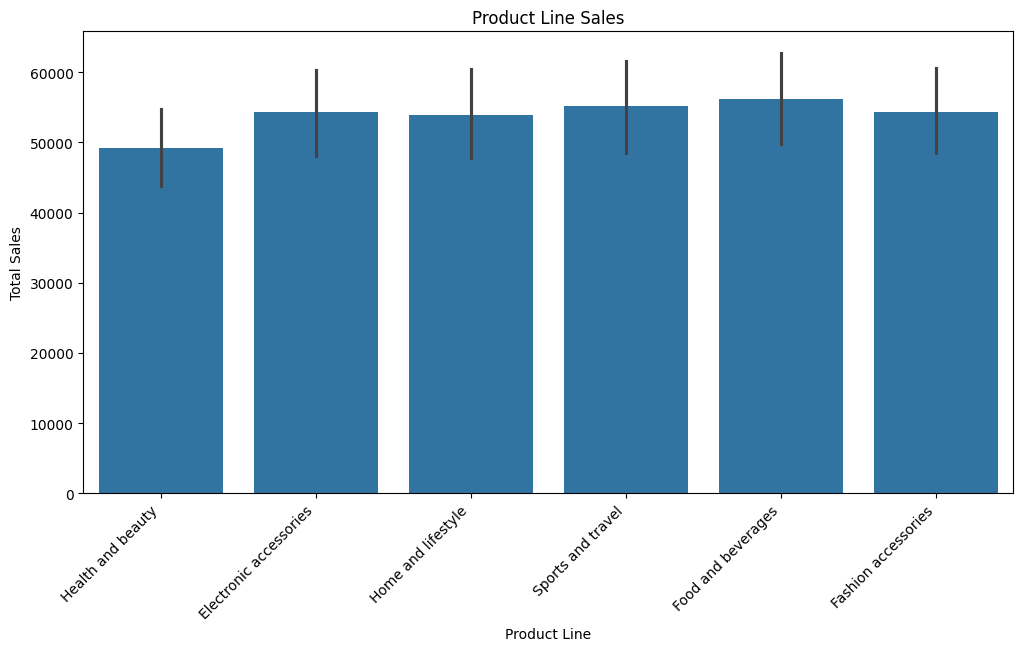

In [10]:
# Visualization 4: Product Line Sales (Bar chart)
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', data=data, estimator=sum)
plt.title('Product Line Sales')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

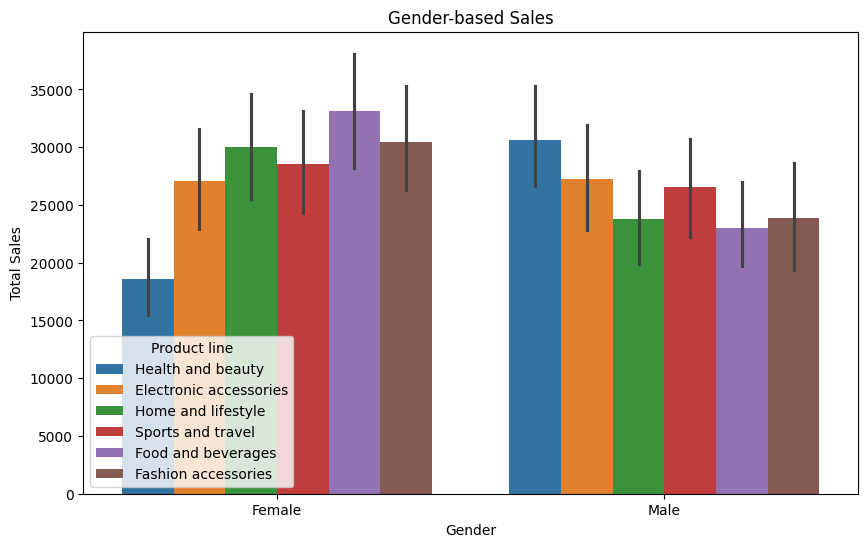

In [11]:
# Visualization 5: Gender-based Sales (Stacked bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Total', hue='Product line', data=data, estimator=sum)
plt.title('Gender-based Sales')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

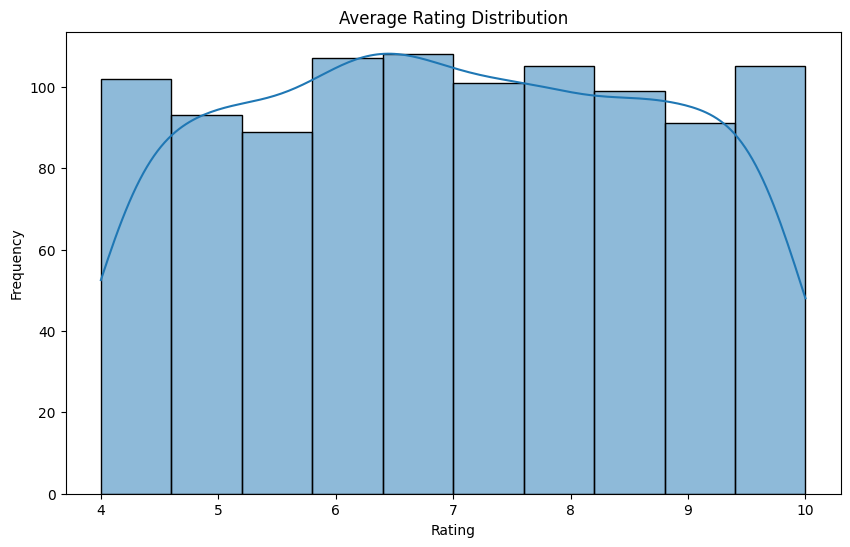

In [12]:
# Visualization 6: Average Rating Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Average Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

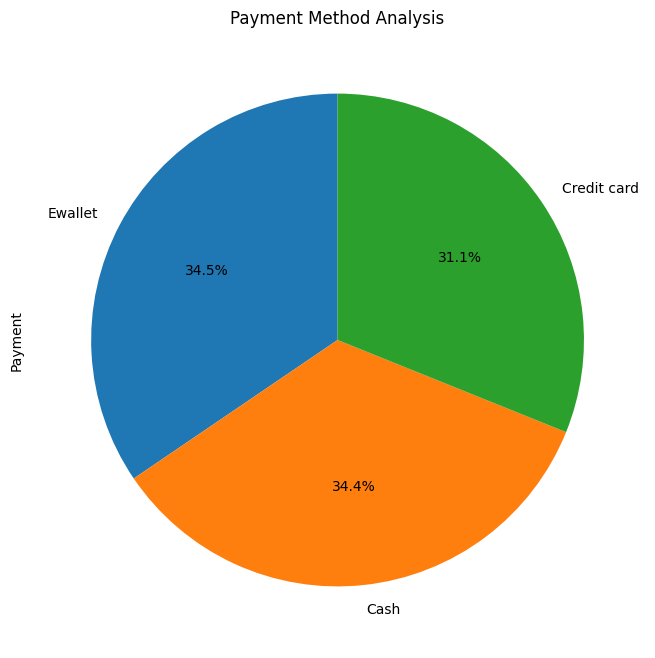

In [13]:
# Visualization 7: Payment Method Analysis (Pie chart)
plt.figure(figsize=(8, 8))
data['Payment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Payment Method Analysis')
plt.show()

<ipython-input-14-6f9b7f5fd0dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


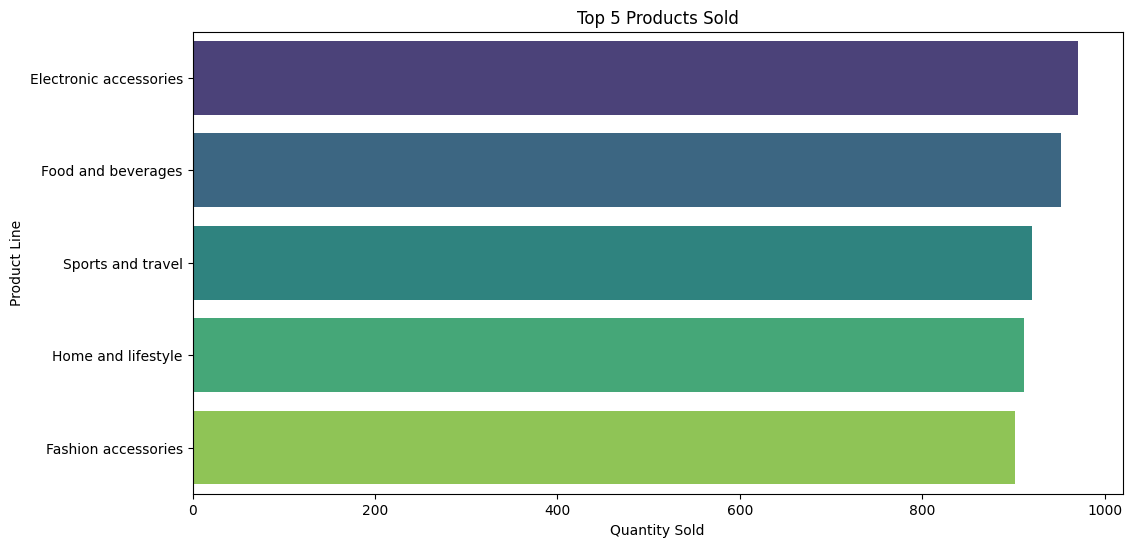

In [14]:
# Visualization 8: Top 5 Products Sold (Horizontal bar chart)
top_products = data.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 5 Products Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Line')
plt.show()

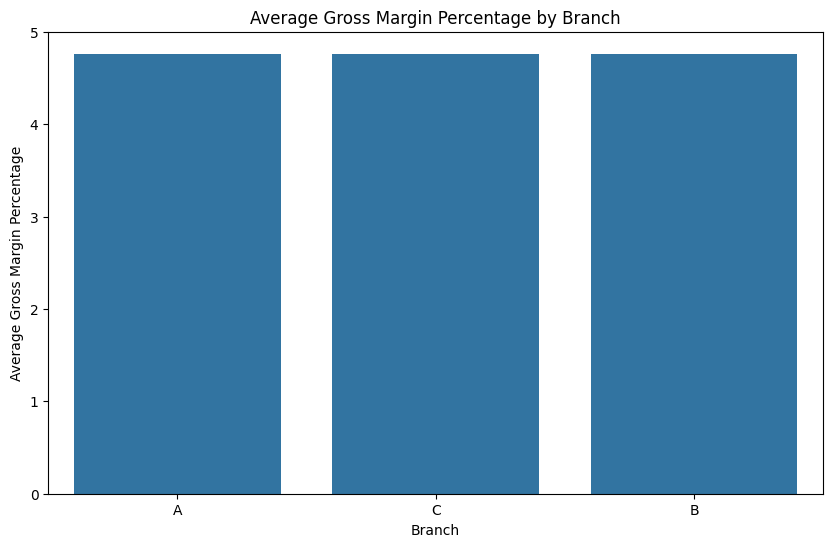

In [15]:
# Visualization 9: Average Gross Margin Percentage by Branch (Bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='gross margin percentage', data=data)
plt.title('Average Gross Margin Percentage by Branch')
plt.xlabel('Branch')
plt.ylabel('Average Gross Margin Percentage')
plt.show()


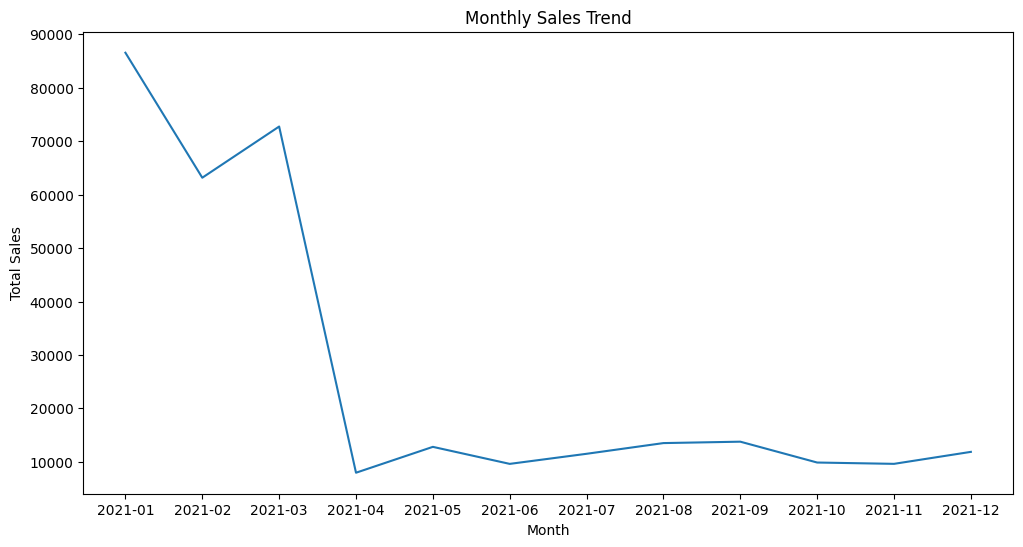

In [17]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Visualization 10: Monthly Sales Trend (Line chart)
monthly_sales = data.groupby(data['Date'].dt.to_period("M"))['Total'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


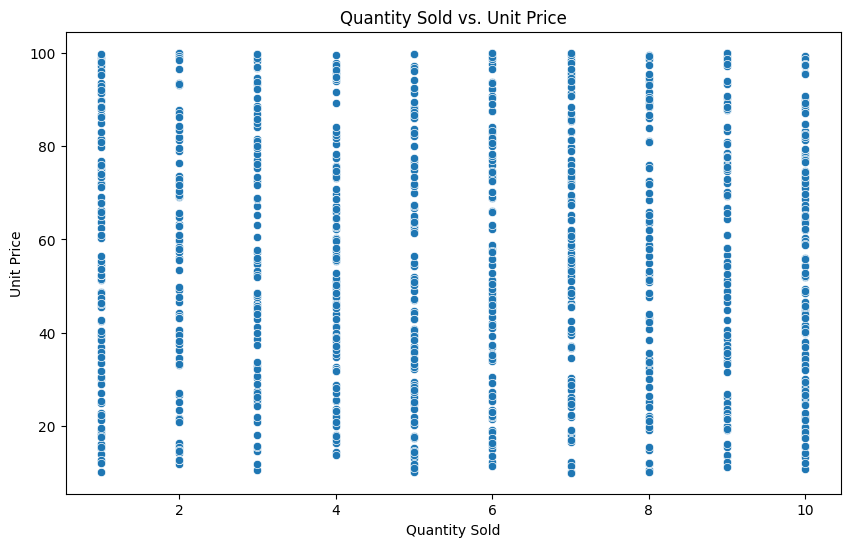

In [18]:
# Visualization 11: Quantity Sold vs. Unit Price (Scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Unit price', data=data)
plt.title('Quantity Sold vs. Unit Price')
plt.xlabel('Quantity Sold')
plt.ylabel('Unit Price')
plt.show()

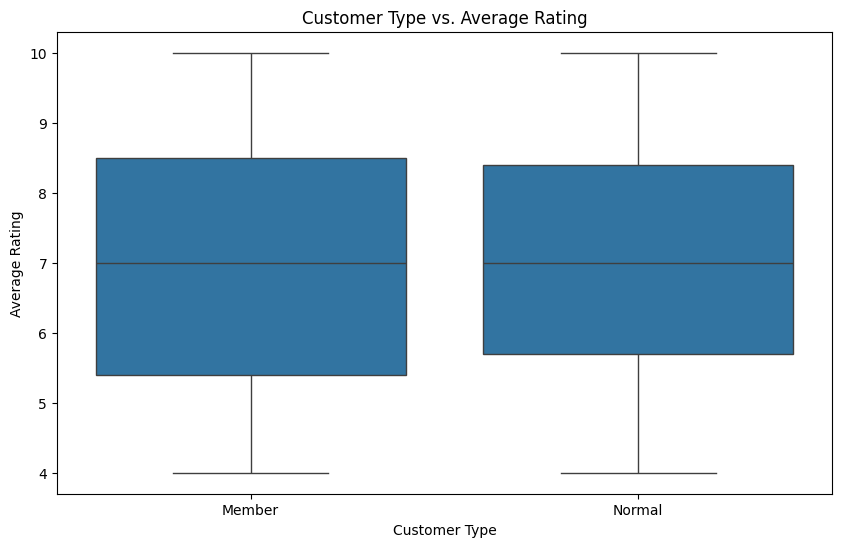

In [19]:
# Visualization 12: Customer Type vs. Average Rating (Box plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Customer_type', y='Rating', data=data)
plt.title('Customer Type vs. Average Rating')
plt.xlabel('Customer Type')
plt.ylabel('Average Rating')
plt.show()